In [4]:
# First of all, we load the basic packages.
import numpy as np
import matplotlib.pyplot as plt
from things import * # We use things.py to load the data
import copy
import math
%matplotlib inline

In [5]:
# Load the dataset
x_train, y_train = load_data()
# Remember that x_train are the studied hours, and y_train are the exam grade

In [6]:
# Let's see how much data we have in total
print('The shape of our data x_train is:', len(x_train))
print('The shape of our data y_train is:', len(y_train))
# We have m = x_train number of examples in total 
print('The shape of our m (examples) is ;', len(x_train))

The shape of our data x_train is: 200
The shape of our data y_train is: 200
The shape of our m (examples) is ; 200


<function matplotlib.pyplot.show(close=None, block=None)>

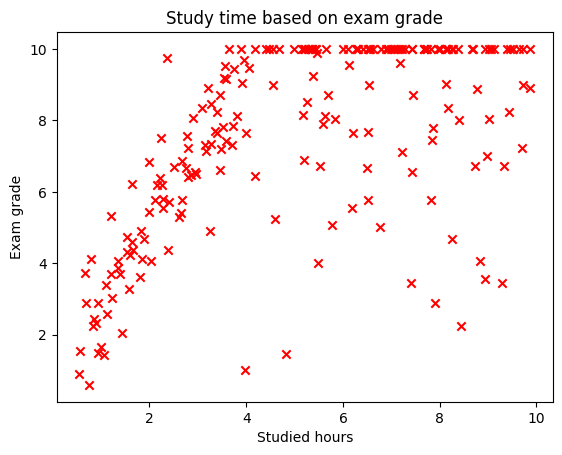

In [7]:
# To see the data better, let's plot it.
plt.scatter(x_train, y_train, marker = 'x' , c = 'r')
plt.title("Study time based on exam grade")
plt.xlabel('Studied hours')
plt.ylabel('Exam grade')
plt.show

# Computing the cost for our model

**1) Write the prediction** $$
f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b
$$

**2) Write the loss function (the cost for a single training)** $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$

**3) Write the cost function for all over the examples** $$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$

*Remember that **m** is the total number of examples (x_train) which we represent as a summation operator*

In [8]:
def cost(x, y, w, b):
    # We create an empty array of m examples
    m = x.shape[0]
    Total_cost = 0 # Here we will store the total cost that the model provides us.
    cost = 0
    for i in range (m):
        f_wb_i = np.dot(x[i], w) + b # The prediction
        cost = cost + (f_wb_i - y[i])**2 # The loss function
        Total_cost = cost/(2*m) # The cost function
        
    return Total_cost

Once we got our cost function model, it's time to implement the **gradient descent**.
Here we got the 4 most important functions of the gradient descent:
$$
w = w - \alpha \cdot \frac{\partial J(w, b)}{\partial w}
$$

$$
b = b - \alpha \cdot \frac{\partial J(w, b)}{\partial b}
$$

$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$


In [9]:
def gradient(x, y, w, b):
    m = x.shape[0] # We create an empty array of m examples
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw/(m)
    dj_db = dj_db/(m)
    
    return dj_dw, dj_db

In [10]:
# Now that we compute our gradient descent, we are going to fully implement

def gradient_descent(x, y, w_in, b_in, cost_in, gradient, alpha, iterations):
    m = len(x) # This is the lenght of the number of examples
    # We store and the values of J, w for each iteration to plot later
    J_stored = []
    w_stored = []
    w = copy.deepcopy(w_in) # To avoid modify the w in the function
    b = b_in

    for i in range(iterations):
        dj_dw, dj_db = gradient(x, y, w, b) # We calculate the gradient and uptdate the parameters
        w = w - alpha * dj_dw # Update the parameters
        b = b - alpha * dj_db
        if i < 100000: # Save the cost in each iteration
            cost_in = cost(x, y, w, b)
            J_stored.append(cost_in)
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/10) == 0:
            w_stored.append(w)
            print(f"Iteration {i:4}: Cost {float(J_stored[-1]):8.2f}   ")
        
    return w, b, J_stored, w_stored

**Thanks to gradient descent we have been able to update the parameters w and b automatically, and find the most optimal ones.**

In [11]:
# We got all already to initialize the parameters
w_initial = 0
b_initial = 0
iterations = 2000
alpha = 0.01
w,b,_,_ = gradient_descent(x_train, y_train, w_initial, b_initial, cost, gradient, alpha, iterations)
print("The optimal parameters for w and b are: ", w, b)

Iteration    0: Cost    16.06   
Iteration  200: Cost     3.20   
Iteration  400: Cost     2.70   
Iteration  600: Cost     2.49   
Iteration  800: Cost     2.41   
Iteration 1000: Cost     2.37   
Iteration 1200: Cost     2.36   
Iteration 1400: Cost     2.35   
Iteration 1600: Cost     2.35   
Iteration 1800: Cost     2.35   
The optimal parameters for w and b are:  0.5805721581410953 4.425871988376453


To calculate the predictions of the entire dataset, we have to loop through all the training examples and calculate the prediction for each example

<function matplotlib.pyplot.show(close=None, block=None)>

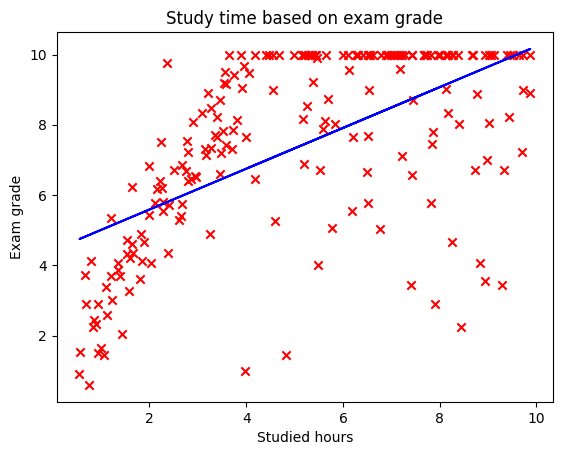

In [12]:
m = x_train.shape[0]
prediction = np.zeros(m)
for i in range(m):
    prediction[i] = w * x_train[i] + b
    
# Now we plot that prediction:
plt.plot(x_train, prediction, c ='b')
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title("Study time based on exam grade")
plt.xlabel('Studied hours')
plt.ylabel('Exam grade')
plt.show

**It's time to see the predictions, you can modify this box and put the value you want to predict, remember that what you are changing is the hours of study of a student, and the linear regression will predict the grade you will get**

In [33]:
prediction1 = 3.5 * w + b
print("Your grade prediction for studying about 3.5 hours is ", prediction1)

prediction2 = 9.34 * w + b
print("Your grade prediction for studying about 9,34 hours is ", prediction2)

prediction3 = 1.34 * w + b
print("Your grade prediction for studying about 1,34 hours is ", prediction3)

Your grade prediction for studying about 3.5 hours is  [6.48140068]
Your grade prediction for studying about 9,34 hours is  [9.82498592]
Your grade prediction for studying about 1,34 hours is  [5.24473216]


## **Implementing linear regression with Scikit-Learn**

There is an even easier way to implement linear regression, using **Scikit-Learn**, is a free software machine learning library for the **Python** programming language. It includes several classification, regression, and cluster analysis algorithms.

In [14]:
from sklearn.linear_model import LinearRegression # Let's import the Linear Regression model from sklearn

In [15]:
x_train, y_train = load_data() # Let's load the data again
# Remember that x_train are the studied hours, and y_train are the exam grade

In [17]:
linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1,1), y_train) # x_train must be a 2-D Matrix (you have to add the .reshape(-1,1)

LinearRegression()

The **w** and **b** are reffered as "coefficients" and "intercept" in scikit-learn

In [26]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [0.57253172], b = 4.48


**If we look at the implementation we made above, we have the same values of w and b**

It's time to make some **predictions**

In [30]:
X_test = np.array([[2.34]]) # Here we put the value of the hours so that it predicts the note for us. You can change the value that is in the brackets
print("The grade for studying 2.34 hours is:", linear_model.predict(X_test))

The grade for studying 2.34 hours is: [5.81726388]


**We can see how the values are literally exact to the implementation above, I encourage you to change values ​​to predict your grade for your next exam!**